In [85]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

sns.set_style('white')

In [94]:
data = pd.read_csv("p2p_use/p2p_data.csv", engine='python')
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

- Data has 28784 rows and 22 columns.
- Column names:  ['annual_inc', 'bc_util', 'chargeoff_within_12_mths', 'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'num_accts_ever_120_pd', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bc_limit', 'avg_cur_bal', 'pct_tl_nvr_dlq', 'revol_bal', 'total_acc', 'int_rate', 'verification_status_B', 'verification_status_C', 'home_ownership_B', 'home_ownership_C', 'term', 'TARGET']


In [95]:
X = data.drop(['TARGET'], axis=1)
y = data['TARGET']

In [96]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters, random_state=20190420)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=20190420, tol=0.0001, verbose=0)

In [97]:
labels_km = km.predict(X)
labels_km

array([0, 0, 0, ..., 0, 0, 1])

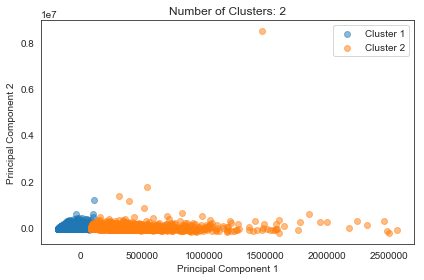

In [98]:
pca = PCA(n_components=2)
Z = pca.fit_transform(X)
plt.figure(1)
for i in range(max(labels_km) + 1):
    plt.scatter(Z[labels_km == i, 0], Z[labels_km == i, 1],
                label='Cluster {}'.format(i + 1), alpha=.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Number of Clusters: {}'.format(n_clusters))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [99]:
silhouette_avg = silhouette_score(X, labels_km)
print("For n_clusters =", n_clusters,
      "| The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 | The average silhouette_score is : 0.6151857399359096


In [100]:
sample_silhouette_values = silhouette_samples(X, labels_km)
pd.DataFrame(sample_silhouette_values).head(10)

,0
0,0.730512
1,0.807997
2,0.259276
3,0.144593
4,0.789838
5,0.208064
6,0.806879
7,0.723576
8,0.807229
9,0.469402


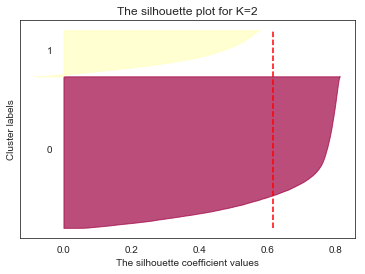

In [101]:
plt.figure(2)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels_km == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.Spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.vlines(x=silhouette_avg, ymin=0, ymax=X.shape[0], color="red", linestyle="--")
plt.title("The silhouette plot for K={}".format(n_clusters))
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster labels")
plt.yticks([])
plt.show()


In [102]:
sil_scores = []
list_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in list_n_clusters:
    km = KMeans(n_clusters=n_clusters)
    labels_km = km.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels_km))

plt.figure(3)
plt.plot(range(1, len(sil_scores) + 1), sil_scores)
plt.title('Silhouette scores')
plt.show()

KeyboardInterrupt: 

In [84]:
method = 'ward' 
metric = 'euclidean'

In [86]:
D = linkage(X, method=method, metric=metric)
pd.DataFrame(D).head(10)

,0,1,2,3
0,1.0,12559.0,0.0,2.0
1,3.0,2445.0,0.0,2.0
2,4.0,2964.0,0.0,2.0
3,231.0,15283.0,0.0,2.0
4,7229.0,15181.0,0.0,2.0
5,3867.0,11165.0,0.0,2.0
6,3955.0,11913.0,0.0,2.0
7,1793.0,12001.0,0.0,2.0
8,4490.0,6222.0,0.0,2.0
9,2589.0,4027.0,0.0,2.0


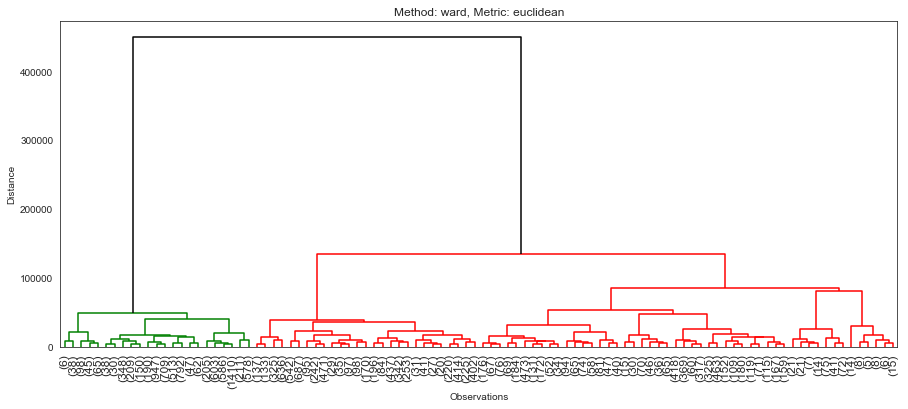

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
dendrogram(Z=D,
           p=100,
           truncate_mode='lastp',
           orientation='top',
           show_leaf_counts=True,
           no_labels=False,
           leaf_font_size=12.,
           leaf_rotation=90.,
           ax=ax,
           above_threshold_color='k')
ax.set_xlabel('Observations')
ax.set_ylabel('Distance')
ax.set_title('Method: {}, Metric: {}'.format(method, metric))
plt.show(fig)

In [88]:
num_clusters = 2
label_hc = fcluster(D, t=num_clusters, criterion='maxclust')

In [89]:
pca = PCA(n_components=2)
Z = pca.fit_transform(X)

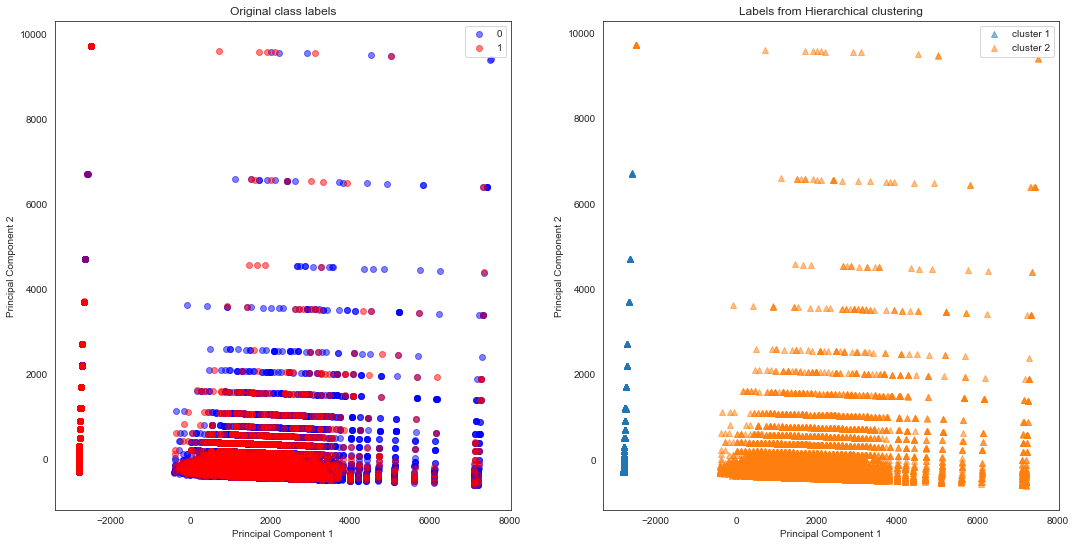

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
axes = axes.ravel()
for label, color in zip((0, 1), ('blue', 'red')):
    axes[0].scatter(Z[y == label, 0], Z[y == label, 1],
                    label=label, color=color, marker='o', alpha=0.5)
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')
    axes[0].legend(loc='best')
    axes[0].set_title('Original class labels')
for i in range(num_clusters):
    axes[1].scatter(Z[label_hc == i + 1, 0], Z[label_hc == i + 1, 1],
                    label='cluster {}'.format(i + 1), marker='^', alpha=0.5)
    axes[1].set_xlabel('Principal Component 1')
    axes[1].set_ylabel('Principal Component 2')
    axes[1].legend(loc='best')
    axes[1].set_title('Labels from Hierarchical clustering')
plt.show(fig)